# TODO
[#2](https://github.com/caelum02/LuX-AI-Season-2/issues/2)
Observation to Input

In [2]:
import jux
from jux.env import JuxEnv
from jux.config import JuxBufferConfig
from jux.state import State
from jux.actions import JuxAction

import jax
import jax.numpy as jnp
from jax import jit, vmap, pmap, grad, random, lax
from jax.tree_util import tree_flatten, tree_unflatten, tree_map
from jax import random

from flax import linen as nn

import rich
import matplotlib.pyplot as plt

import utils as ut
import preprocess as pp

from importlib import reload

MAP_SIZE=64

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
reload(ut)
lux_env, lux_actions = jux.utils.load_replay('../data/52958192.json')
jux_env, state = JuxEnv.from_lux(lux_env, buf_cfg=JuxBufferConfig(MAX_N_UNITS=1000))

state, lux_actions = ut.replay_run_early_phase(jux_env, state, lux_actions)
state, lux_actions = ut.replay_run_n_late_game_step(750, jux_env, state, lux_actions)

[Replay Util] Replaying early steps
[Replay Util] Replaying early steps - Done
[Replay Util] Replaying 1/750 steps
[Replay Util] Replaying 2/750 steps
[Replay Util] Replaying 3/750 steps
[Replay Util] Replaying 4/750 steps
[Replay Util] Replaying 5/750 steps
[Replay Util] Replaying 6/750 steps
[Replay Util] Replaying 7/750 steps
[Replay Util] Replaying 8/750 steps
[Replay Util] Replaying 9/750 steps
[Replay Util] Replaying 10/750 steps
[Replay Util] Replaying 11/750 steps
[Replay Util] Replaying 12/750 steps
[Replay Util] Replaying 13/750 steps
[Replay Util] Replaying 14/750 steps
[Replay Util] Replaying 15/750 steps
[Replay Util] Replaying 16/750 steps
[Replay Util] Replaying 17/750 steps
[Replay Util] Replaying 18/750 steps
[Replay Util] Replaying 19/750 steps
[Replay Util] Replaying 20/750 steps
[Replay Util] Replaying 21/750 steps
[Replay Util] Replaying 22/750 steps
[Replay Util] Replaying 23/750 steps
[Replay Util] Replaying 24/750 steps
[Replay Util] Replaying 25/750 steps
[Repl

In [21]:
from jux.unit import UnitType 
from jax import vmap, jit
from functools import partial

reload(pp)
unit_feature = pp.get_unit_feature(state)

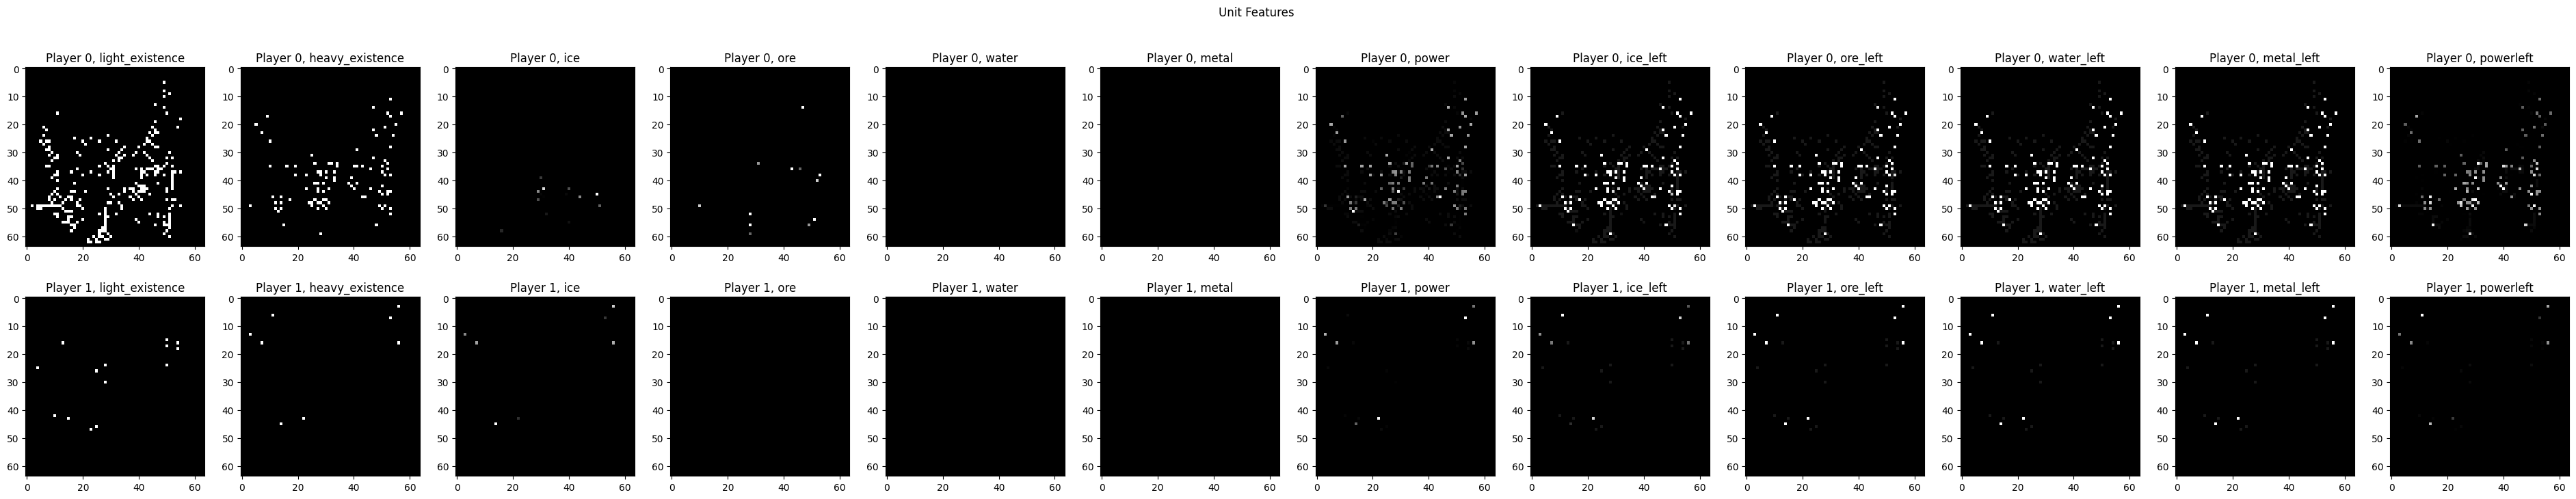

In [22]:
fig, axes = plt.subplots(2, 12, figsize=(48, 8))
features = ['light_existence', 'heavy_existence', 'ice', 'ore', 'water', 'metal', 'power', 'ice_left', 'ore_left', 'water_left', 'metal_left', 'powerleft']
for i in range(2):
    for j in range(12):
        axes[i, j].imshow(unit_feature[i, :, :, j], cmap='gray')
        axes[i, j].set_title(f"Player {i}, {features[j]}")
fig.suptitle("Unit Features")
plt.show()

In [5]:
previous_state = state
state, lux_actions = ut.replay_run_n_late_game_step(1, jux_env, state, lux_actions)

[Replay Util] Replaying 1/1 steps


In [10]:
reload(pp)
factory_feature = pp.get_factory_feature(state, previous_state.factories.power)

In [11]:
factory_feature.shape

(2, 64, 64, 7)

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
features = ['existence', 'ice', 'ore', 'water', 'metal', 'power', 'previous_power']
for i in range(2):
    for j in range(7):
        axes[i, j].imshow(factory_feature[i, :, :, j], cmap='gray')
        axes[i, j].set_title(f"Player {i}, {features[j]}")
fig.suptitle("Factory Features")
plt.show()
